In [1]:
from result_summary import * 

In [29]:
#晚上交易的算下一个交易日 business_date
#返回所有交易记录  find_transaction(path)
#读取合约的每天收益净值 find_instrument_equitys(path,instrument)
#计算策略所有合约收益率 calc_instrument_rets(path); rtn_compare(benchmark,path)
#计算每日收益 calc_daily_rets(path)
#回测结果绘表 result_pf(path,benchmark)
#计算一个品种每日收益 calc_instrument_daily_ret(df)
#返回一个品种的回测结果 instrument_result_pf(instrument,path,benchmark,start_date)
#返回所有回测结果里各品种的最大收益和基准收益做比较 max_instrument_rtn(df,benchmark)

In [16]:
#读取基准和回测结果路径
benchmark = 'C:/Users/Administrator/Desktop/Work/data/CTA_algo/backtesting/result0_0/'
path = 'C:/Users/Administrator/Desktop/Work/data/CTA_algo/backtesting/result100_1/'
instrument = 'm1709'

In [30]:
#读取所有下单记录
dft = find_transaction(path)
dft

,direction,instrument,lots,open_close,order_id,price,status,real_trade_date
datetime,,,,,,,,
2016-12-05 10:32:44,0,rm705,5,0,0.0,2441.0,1,2016-12-05
2016-12-05 10:42:59,0,m1705,1,0,0.0,2911.0,1,2016-12-05
2016-12-05 10:43:57,0,m1705,1,0,1.0,2912.0,1,2016-12-05
2016-12-05 10:44:22,0,m1705,1,0,2.0,2912.0,1,2016-12-05
2016-12-05 10:59:45,1,m1705,2,1,3.0,2914.0,1,2016-12-05
2016-12-05 10:59:45,1,m1705,1,1,4.0,2914.0,1,2016-12-05
2016-12-05 11:01:03,1,rm705,2,1,1.0,2449.0,1,2016-12-05
2016-12-05 11:01:05,1,rm705,1,1,3.0,2449.0,1,2016-12-05
2016-12-05 11:01:05,1,rm705,1,1,2.0,2449.0,1,2016-12-05


In [32]:
#计算每日开平仓
open_lots = dft[dft.open_close == 0].groupby('real_trade_date')['lots'].sum()
close_lots = dft[dft.open_close == 1].groupby('real_trade_date')['lots'].sum()
pd.DataFrame([open_lots, close_lots]).T

,lots,lots
2016-12-05,43.0,37.0
2016-12-06,821.0,825.0
2016-12-07,924.0,896.0
2016-12-08,1109.0,1124.0
2016-12-09,277.0,292.0
2016-12-12,427.0,427.0
2016-12-13,839.0,794.0
2016-12-14,1008.0,1053.0
2016-12-15,572.0,572.0
2016-12-16,399.0,399.0


In [33]:
#显示每日持仓数量
tran.daily_position_from_trancation(dft)

real_trade_date  instrument  direction_for_position
2016-12-05       cf705       1                           1
                 cs1705      1                           5
                 m1705       0                           0
                             1                           0
                 p1705       0                           0
                 rm705       0                           0
                             1                           0
                 ta705       0                           0
                 y1705       0                           0
2016-12-06       a1705       0                           0
                 cf705       1                           0
                 cs1705      1                           0
                 m1705       0                           0
                 p1705       0                           0
                 rb1705      1                           0
                 rm705       0                           0
    

In [34]:
#显示某合约所有交易记录
df = find_transaction(benchmark)
df[df.instrument == instrument]

,direction,instrument,lots,open_close,order_id,price,status,real_trade_date
datetime,,,,,,,,
2017-03-01 21:05:10,0,m1709,2,0,0.0,2955.0,1,2017-03-02
2017-03-01 21:15:19,1,m1709,1,1,2.0,2956.0,1,2017-03-02
2017-03-01 21:15:19,1,m1709,1,1,1.0,2956.0,1,2017-03-02
2017-03-17 21:03:14,0,m1709,3,0,3.0,2873.0,1,2017-03-20
2017-03-17 21:03:37,0,m1709,2,0,4.0,2872.0,1,2017-03-20
2017-03-17 21:05:47,1,m1709,1,1,5.0,2871.0,1,2017-03-20
2017-03-17 21:05:47,1,m1709,1,1,6.0,2871.0,1,2017-03-20
2017-03-17 21:05:50,1,m1709,1,1,7.0,2871.0,1,2017-03-20
2017-03-17 21:11:20,1,m1709,2,1,8.0,2871.0,1,2017-03-20


In [5]:
#显示某品种账户净值变化
find_instrument_equitys(path,'fg709')

,timestamp,equitys,pnl,fee,datetime
0,1480949995000,500000.0,0.00,0.0,2016-12-05 14:59:55
1,1481036399000,500000.0,0.00,0.0,2016-12-06 14:59:59
2,1481122796000,500000.0,0.00,0.0,2016-12-07 14:59:56
3,1481209198000,500000.0,0.00,0.0,2016-12-08 14:59:58
4,1481295599000,500000.0,0.00,0.0,2016-12-09 14:59:59
5,1481554798000,500000.0,0.00,0.0,2016-12-12 14:59:58
6,1481641199000,500000.0,0.00,0.0,2016-12-13 14:59:59
7,1481727596000,500000.0,0.00,0.0,2016-12-14 14:59:56
8,1481813999000,500000.0,0.00,0.0,2016-12-15 14:59:59
9,1481900399000,500000.0,0.00,0.0,2016-12-16 14:59:59


In [6]:
#计算回测中所有品种的收益率
calc_instrument_rets(path)

instrument
a1705    -0.001986
a1709    -0.005802
a1801    -0.000172
al1705    0.002241
bu1705   -0.000059
bu1706   -0.067067
bu1709   -0.004347
c1705     0.017760
c1709     0.021326
c1801    -0.003322
cf705    -0.013127
cf709     0.012943
cs1705    0.171757
cs1709    0.066955
cs1801   -0.005002
cu1702   -0.017626
cu1703   -0.003167
cu1704   -0.006807
cu1705   -0.012826
cu1706    0.000347
cu1707   -0.003849
cu1708   -0.009129
cu1709    0.000590
fg705     0.033212
fg709    -0.006588
i1705    -0.002705
i1709    -0.004069
j1705     0.008401
j1709    -0.000191
jd1705    0.019105
            ...   
pp1705   -0.076366
pp1709    0.047374
pp1801    0.000000
rb1705    0.120661
rb1710    0.041756
rb1801    0.000000
rm705    -0.019326
rm709     0.043090
rm801     0.001537
ru1705   -0.234906
ru1709    0.001123
ru1801   -0.001060
sm709    -0.048867
sr705    -0.055258
sr709     0.021731
ta705    -0.386464
ta709    -0.007106
v1709     0.001904
y1705     0.271290
y1709    -0.000484
y1801     0.000778
z

In [7]:
#比较基准和策略回测各品种收益率
rtn_compare(benchmark,path)

,backtest,benchmark,change
instrument,,,
ta705,-0.386464,0.058050,-0.444513
m1705,-0.193698,0.085069,-0.278767
ru1705,-0.234906,0.009742,-0.244647
ni1705,-0.159414,-0.038712,-0.120702
bu1706,-0.067067,-0.012817,-0.054250
rm705,-0.019326,0.033852,-0.053178
sr705,-0.055258,-0.013912,-0.041346
l1705,0.001621,0.033425,-0.031804
ru1709,0.001123,0.024493,-0.023370


In [8]:
#计算策略回测每日收益率
calc_daily_rets(path)

datetime
2016-12-05         NaN
2016-12-06    0.025949
2016-12-07   -0.020712
2016-12-08   -0.028191
2016-12-09    0.092565
2016-12-12    0.021845
2016-12-13    0.027341
2016-12-14    0.077306
2016-12-15   -0.067678
2016-12-16   -0.004651
2016-12-19    0.050234
2016-12-20    0.008119
2016-12-21    0.030811
2016-12-22   -0.025922
2016-12-23    0.000629
2016-12-26   -0.078543
2016-12-27    0.009763
2016-12-28    0.013745
2016-12-29    0.071404
2016-12-30    0.061764
2017-01-03    0.009794
2017-01-04   -0.006935
2017-01-05   -0.026652
2017-01-06    0.050377
2017-01-09    0.025835
2017-01-10   -0.000929
2017-01-11    0.030445
2017-01-12   -0.007937
2017-01-13    0.035583
2017-01-16    0.034634
                ...   
2017-06-12    0.004095
2017-06-13    0.036424
2017-06-14    0.026514
2017-06-15   -0.020604
2017-06-16    0.042402
2017-06-19    0.019820
2017-06-20    0.014614
2017-06-21   -0.041463
2017-06-22    0.031205
2017-06-23   -0.020372
2017-06-26   -0.015588
2017-06-27    0.018127
20

Entire data start date: 2016-12-06
Entire data end date: 2017-07-21
Backtest months: 7


,Backtest
Annual return,-39.9%
Cumulative returns,-26.6%
Annual volatility,118.0%
Sharpe ratio,0.15
Calmar ratio,-0.56
Stability,0.64
Max drawdown,-70.6%
Omega ratio,1.03
Sortino ratio,0.22
Skew,0.53


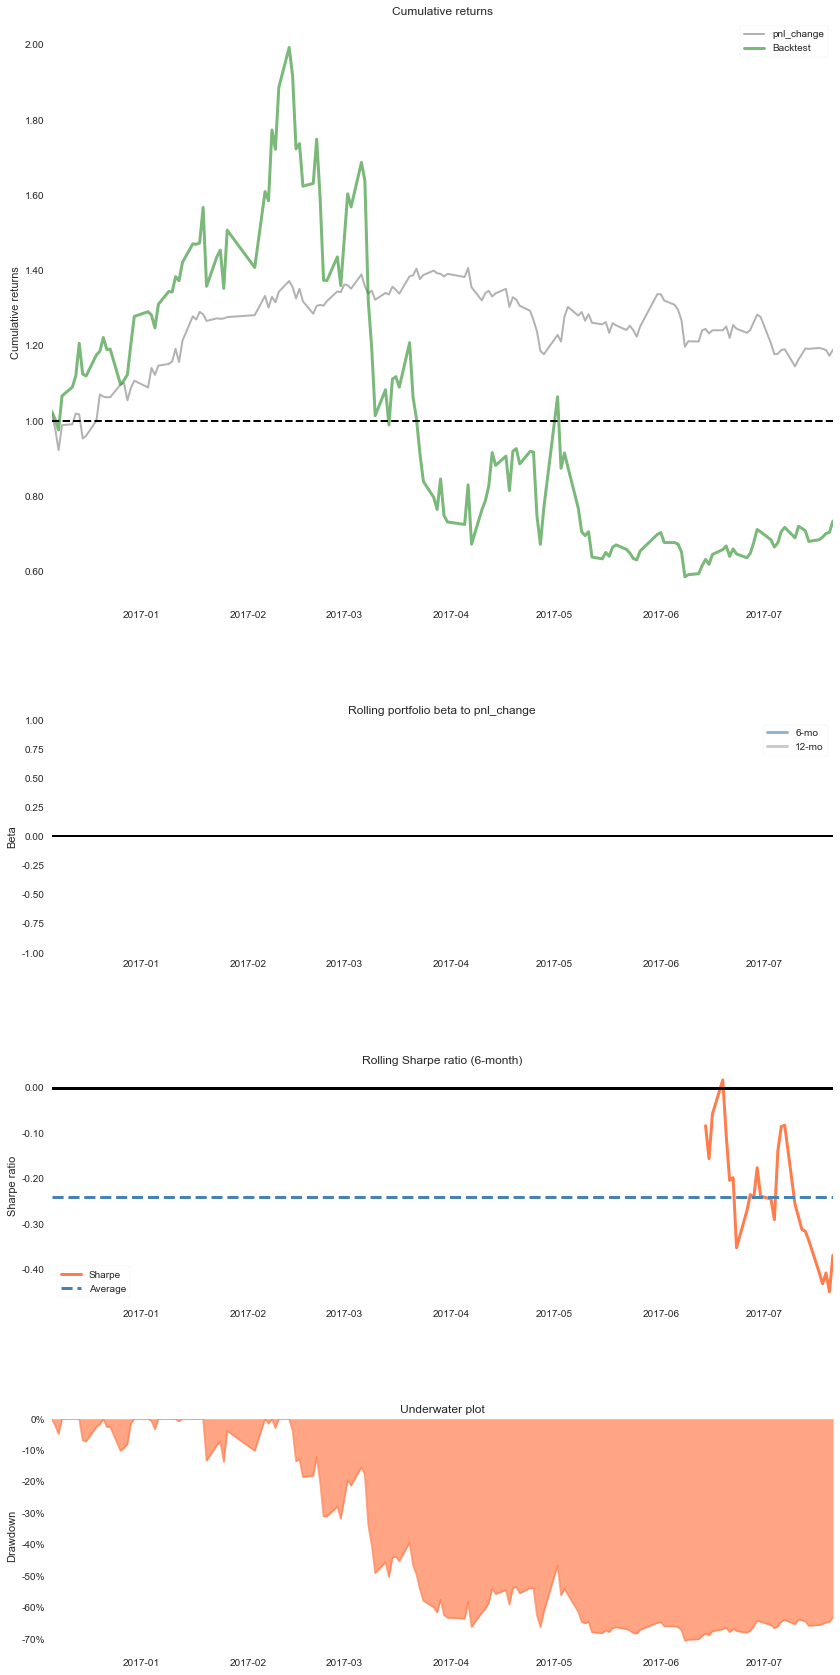

In [9]:
#统计策略回测结果
result_pf(path,benchmark)

Entire data start date: 2016-12-06
Entire data end date: 2017-07-21
Backtest months: 7


,Backtest
Annual return,-1.1%
Cumulative returns,-0.7%
Annual volatility,4.3%
Sharpe ratio,-0.23
Calmar ratio,-0.29
Stability,0.45
Max drawdown,-3.7%
Omega ratio,0.94
Sortino ratio,-0.33
Skew,NaN


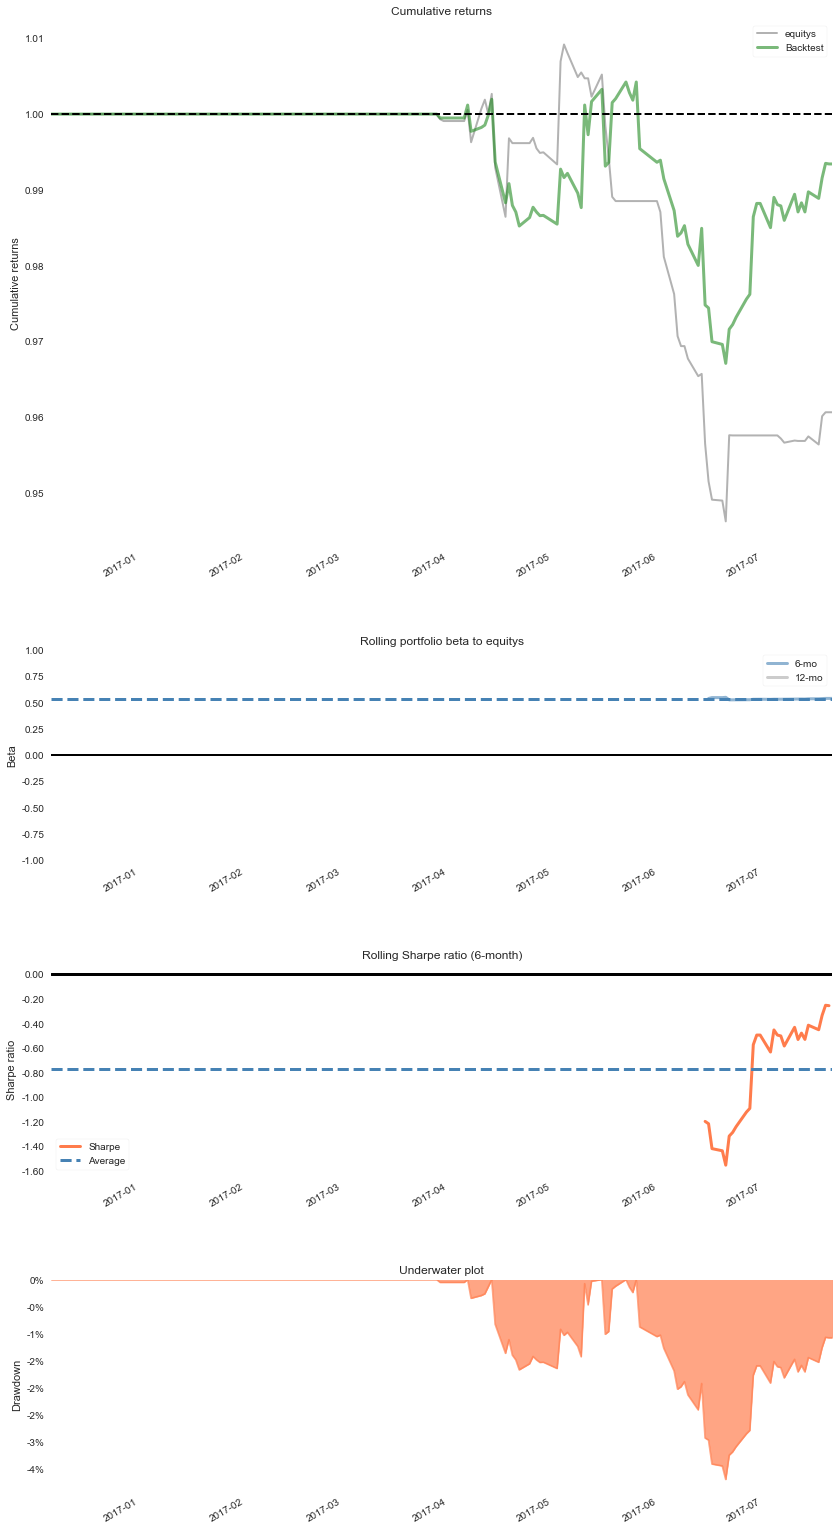

In [10]:
#统计某品种回测结果
instrument_result_pf('fg709',path,benchmark,None)

In [26]:
#读取所有策略回测结果并列出各品种收益率
ss = []    
for i in [60, 70]:
    for j in [1]:
        path = 'C:/Users/Administrator/Desktop/Work/data/CTA_algo/backtesting/result{}_{}'.format(i, j)
        s = calc_instrument_rets(path) #- calc_rets(benchmark)
        #s = s[s < -0.01]
        s.name = '{}_{}'.format(i,j)
        ss.append(s)
df = pd.DataFrame(ss).T
df

,60_1,70_1
instrument,,
a1705,-0.013147,-0.005690
a1709,-0.006202,-0.006872
a1801,-0.000232,-0.000232
al1705,0.001991,0.002141
bu1705,-0.000059,-0.000059
bu1706,-0.077983,-0.072775
bu1709,-0.008347,-0.007507
c1705,0.014360,0.014360
c1709,0.016809,0.018664


In [27]:
#选取策略中各品种最大收益率并与基准作比较
max_instrument_rtn(df,benchmark)

,maxvalue,benchmark,diff
instrument,,,
a1705,-0.005690,-0.013174,0.007484
a1709,-0.006202,-0.019372,0.013170
a1801,-0.000232,-0.000232,0.000000
al1705,0.002141,0.001141,0.001000
bu1705,-0.000059,-0.000460,0.000400
bu1706,-0.072775,-0.012817,-0.059958
bu1709,-0.007507,-0.009150,0.001644
c1705,0.014360,0.009822,0.004538
c1709,0.018664,0.007856,0.010808


In [28]:
#找到最大收益率出现时的参数设置
df1=df.T
df2 = df1[df1 == df1.max()]
df2=df2.T
df2

,60_1,70_1
instrument,,
a1705,NaN,-0.005690
a1709,-0.006202,NaN
a1801,-0.000232,-0.000232
al1705,NaN,0.002141
bu1705,-0.000059,-0.000059
bu1706,NaN,-0.072775
bu1709,NaN,-0.007507
c1705,0.014360,0.014360
c1709,NaN,0.018664


In [52]:
#pd.DataFrame(df2.iloc[4].dropna()).first

<bound method NDFrame.first of         bu1705
60_1 -0.000059
70_1 -0.000059>